In [1]:
#importing data visualization library
import seaborn as sns
#importing library for arrays
import numpy as np
#import matplotlib for ploting the images
import matplotlib.pyplot as plt
#importing library for data manipulation 
import pandas as pd
#importing library for computer vision problems
import cv2
import os
#importing the library for checking efficiency 
import time
#import tensorflow for training neural network model
import tensorflow as tf

#importing for data splitting for building face mask recognition 
from sklearn.model_selection import train_test_split
#importing layers used in training Face Mask Recognition 
from tensorflow.keras import layers
#importing CNN model for training the Face Mask Recognition
from tensorflow.keras import Sequential
#import keras for building and testing deep learning models
from tensorflow import keras

In [2]:
#checking the number of images in the folder
def files():
    total = 0
    for a in FOLDER:
        base = os.path.join(LOCATION, DATASET_FOLDER, a)
        directory = os.listdir(base)
        for b in directory:
            labeled = os.path.join(base, b)
            images = os.listdir(labeled)
            total += len(images)
            print(f'{total}Files')

In [3]:
#making an array and giving a shape to the images
FINAL = []
IMAGES = []

image_map = { 
'WITH_MASK':1,
'WITH_OUT_MASK':0
}

skipped = 0

LOCATION ="" #location is empty because this is the location in which .py file is stored
DATASET_FOLDER ='Face Mask Recognition Model Kaggle DataSet - Copy'

image_shape = 60

In [4]:
#reading the images, converting them in grayscale and resizing the images
FOLDER = os.listdir(os.path.join(LOCATION, DATASET_FOLDER))

files()
for a in FOLDER:
    base = os.path.join(LOCATION, DATASET_FOLDER, a)
    directory = os.listdir(base)
    for b in directory:
        labeled = os.path.join(base, b)
        images = os.listdir(labeled)
        print(f'{a}/{b}') #it will look into all the folders till this part 
        for c in images:
            image_path = os.path.join(labeled, c)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            try:
                image = cv2.resize(image,(image_shape, image_shape))
            except Exception as E:
                    skipped += 1
                    print(E)
                    continue
            IMAGES.append(image)
            FINAL.append(image_map[b])
print(f'\n{skipped} Skipped')

#saving the array files
with open(r'MODEL/IMAGES.npy', 'wb') as file:
     np.save(file,np.array(IMAGES))
     print('\n IMAGES File saved.')

with open(r'MODEL/FINAL.npy', 'wb') as file:
     np.save(file,np.array(FINAL))
     print('\n FINAL file saved.')
                        
time.sleep(100) 

1048Files
2596Files
3737Files
4799Files
6335Files
7553Files
TEST/WITH_MASK
TEST/WITH_OUT_MASK
TRAIN/WITH_MASK
TRAIN/WITH_OUT_MASK
VALIDATION/WITH_MASK
VALIDATION/WITH_OUT_MASK

0 Skipped

 IMAGES File saved.

 FINAL file saved.


In [5]:
#loading the saved IMAGES.npy file for training model
IMAGES = np.load('IMAGES.npy')

In [6]:
#loading the saved IMAGES.npy file for training model
FINAL = np.load('FINAL.npy')

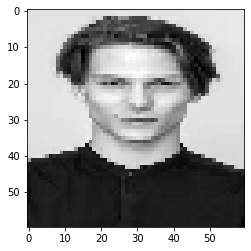

In [7]:
#random picture selected from the dataset to check if the picture has mask or not
plt.imshow(IMAGES[96],cmap='gray')

In [8]:
#preprocessing the images of the dataset using tensorflow
datasetpictures = IMAGES.copy()
updated = []

for a in datasetpictures:
    PICTURE = a.reshape((*a.shape,1))
    PICTURE = tf.convert_to_tensor(PICTURE)
    updated.append(tf.image.grayscale_to_rgb(PICTURE).numpy()/255.)
    
IMAGES = updated.copy()

In [9]:
#split the data for Face Mask Recognition Model
traina, testa, trainb, testb = train_test_split(IMAGES, FINAL, random_state=340, shuffle=True, test_size=0.20)
traina = np.array(traina)
testa = np.array(testa)

In [10]:
#checking the image shape for building the model
image_shape = traina[0].shape
image_shape

(60, 60, 3)

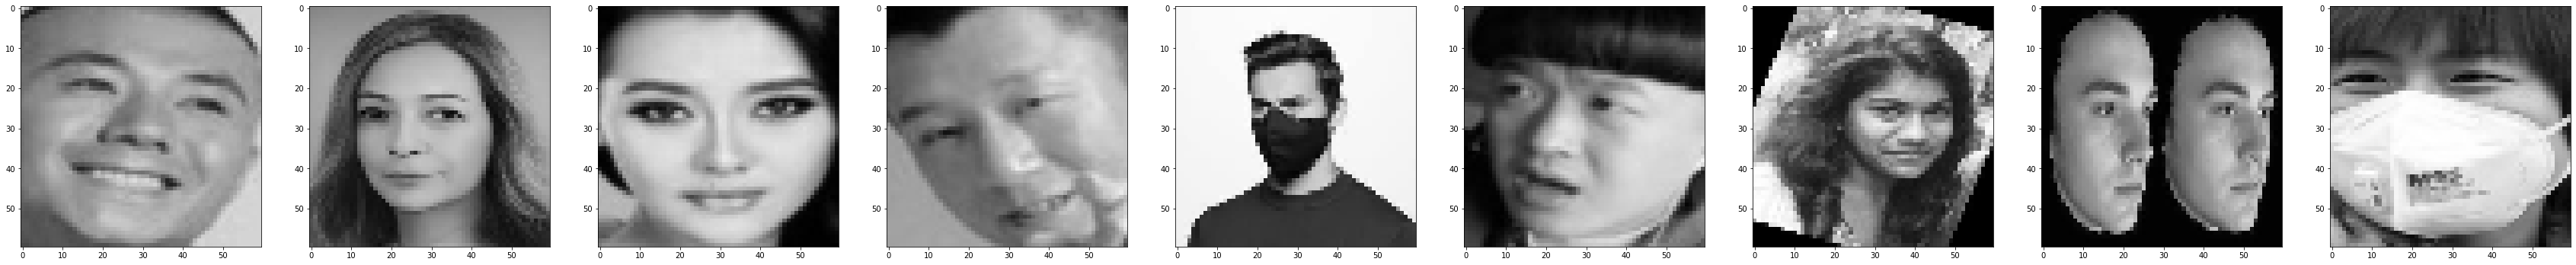

In [11]:
#visualization of the images in the dataset 
plt.figure(figsize=[60,60])
for a in np.arange(1,10):
    plt.subplot(int(f"19{a}"))
    plt.imshow(traina[np.random.randint(0,6042)], cmap='gray')

In [12]:
#Building of CNN for Face Mask Recognition 
CNN=Sequential()

CNN.add(layers.Conv2D(32,(3,3), input_shape=image_shape))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))

CNN.add(layers.Conv2D(64,(3,3)))
CNN.add(layers.Activation('relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))

CNN.add(layers.Conv2D(128,(3,3)))
CNN.add(layers.Activation('relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2,2)))

CNN.add(layers.Conv2D(256,(3,3)))
CNN.add(layers.Activation('relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))

CNN.add(layers.Flatten())
CNN.add(layers.Dropout(0.5))
CNN.add(layers.Dense(64,activation='relu'))
CNN.add(layers.Dropout(0.4))

CNN.add(layers.Dense(2,activation='softmax'))

adam = tf.keras.optimizers.Adam(0.001)
CNN.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [13]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 27, 27, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 128)       0

In [14]:
#getting the details of the model using epochs
MODELDETAILS = CNN.fit(x=traina,
                    y=trainb,
                    batch_size=100,
                    epochs=30, 
                    validation_split=0.15,
                    verbose=2,
                    shuffle=True)

Epoch 1/30
52/52 - 12s - loss: 0.6701 - accuracy: 0.5790 - val_loss: 0.6035 - val_accuracy: 0.6637
Epoch 2/30
52/52 - 12s - loss: 0.5077 - accuracy: 0.7544 - val_loss: 0.3309 - val_accuracy: 0.8434
Epoch 3/30
52/52 - 11s - loss: 0.3673 - accuracy: 0.8415 - val_loss: 0.2753 - val_accuracy: 0.9041
Epoch 4/30
52/52 - 13s - loss: 0.2944 - accuracy: 0.8759 - val_loss: 0.2866 - val_accuracy: 0.8743
Epoch 5/30
52/52 - 13s - loss: 0.2802 - accuracy: 0.8798 - val_loss: 0.2291 - val_accuracy: 0.8931
Epoch 6/30
52/52 - 12s - loss: 0.2264 - accuracy: 0.9048 - val_loss: 0.1596 - val_accuracy: 0.9471
Epoch 7/30
52/52 - 12s - loss: 0.1811 - accuracy: 0.9293 - val_loss: 0.1676 - val_accuracy: 0.9316
Epoch 8/30
52/52 - 12s - loss: 0.1473 - accuracy: 0.9443 - val_loss: 0.1807 - val_accuracy: 0.9305
Epoch 9/30
52/52 - 12s - loss: 0.1199 - accuracy: 0.9533 - val_loss: 0.1244 - val_accuracy: 0.9526
Epoch 10/30
52/52 - 12s - loss: 0.0986 - accuracy: 0.9636 - val_loss: 0.1196 - val_accuracy: 0.9559
Epoch 11/

In [15]:
#fetching the loss and accuracy of the model developed above
CNN.evaluate(testa, testb)

48/48 [==============================] - 2s 33ms/step - loss: 0.3782 - accuracy: 0.9338


[0.37824180722236633, 0.9338186383247375]

In [16]:
#saving the developed model using h5 extension because it has a large number of data in it
CNN.save('recognition.h5')

In [17]:
#loading the model for classification 
recognition = keras.models.load_model(r'recognition.h5')
recognition

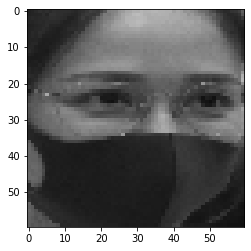

In [18]:
#reading the image and converting the image in gray scale for testing the model build
simage_path = 'with_mask_1168.jpg'

READ = cv2.imread(simage_path)
READ = cv2.cvtColor(READ, cv2.COLOR_BGR2RGB)
original_image = cv2.cvtColor(READ, cv2.COLOR_RGB2GRAY)
SIMAGE = cv2.resize(original_image,(60,60))
SIMAGE = SIMAGE.reshape((*SIMAGE.shape,1))
SIMAGE = tf.convert_to_tensor(SIMAGE)
SIMAGE = tf.image.grayscale_to_rgb(SIMAGE).numpy()/255.
result = SIMAGE.reshape(1,*SIMAGE.shape)

plt.imshow(result[0],cmap='gray')

In [19]:
#predicting the result of the image loaded
recognition.predict(result)

array([[3.6828092e-09, 1.0000000e+00]], dtype=float32)

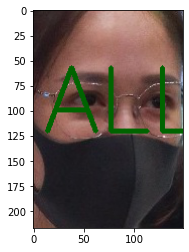

In [20]:
MIMAGE = tf.math.argmax(recognition.predict(result),1).numpy()[0]

#using with_without function checking if the loaded image has mask or not 
def with_without(images):
    if MIMAGE:
         plt.imshow(cv2.putText(images,
                             'ALLOWED',(11,120),
                             cv2.FONT_HERSHEY_SIMPLEX,
                             fontScale=3,
                             color=(0,100,0),thickness=3))
    else:
        plt.imshow(images)
    
with_without(READ)

In [21]:
#loading the saved model for building the real time face mask recogntion model
recognition = keras.models.load_model(r'recognition.h5')
recognition

In [22]:
#using mask function checking if the image that will appear in the frame has a mask or not 
def mask(READ):
    mask_result={
        0:'*WARNING* NOT ALLOWED',
        1:'ALLOWED'
    }
    original_image = cv2.cvtColor(READ, cv2.COLOR_RGB2GRAY)
    mask_image=0
    
    try:
        RIMAGE = cv2.resize(original_image,(60,60))
        RIMAGE = RIMAGE.reshape((*RIMAGE.shape,1))
        RIMAGE = tf.convert_to_tensor(RIMAGE)
        RIMAGE = tf.image.grayscale_to_rgb(RIMAGE).numpy()/255.
        result = RIMAGE.reshape(1, *RIMAGE.shape)
        mask_image = tf.math.argmax(recognition.predict(result),1).numpy()[0]
    except Exception as E:
        print(E)
    else:
        READ = cv2.putText(READ,
                          f'{mask_result[mask_image]}',(20,60),
                          cv2.FONT_HERSHEY_DUPLEX,
                          color=(0,0,255), thickness=3,
                          fontScale=1)
        
    return READ

In [ ]:
#loading the device for real time face mask recognition 
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("ERROR")
while True:
    output, device = cap.read()
    if output:
        time.sleep(1/cap.get(cv2.CAP_PROP_FPS))
        device = mask(device)
        cv2.imshow("Bhawna Gaba Device", device)
        if cv2.waitKey(1) & 0xFF == 20:
            break
    else:
        break
cap.release()    
cv2.destroyAllWindows()